In [452]:
import importlib
import lab2
import copy
import numpy as np
from cv2 import imread, imwrite, imshow, waitKey, COLOR_BGR2RGB, cvtColor, vconcat, hconcat, putText, \
    FONT_HERSHEY_SIMPLEX, resize
import time

#from diffusion import take_params, get_probs, fill_graph_edges, diffusion_alg, labeling
# importlib.reload(lab2)

Read the image as float array, rescale it and set the parameters:

In [453]:
filename = "field1.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)

Zero iteration:

- take parameters of normal distribution from sky and ground on image;
- create an array of probabilities of class 0 and class 1 for each pixel;
- create start graph with edges depends on epsilon and probabilities;

In [454]:
start_time = time.time()

mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)

zero_iter_time = time.time() - start_time
print("Zero iteration time:  %s seconds; " % zero_iter_time)

Zero iteration time:  0.8997085094451904 seconds; 


Some start graph edges:

In [455]:
print(graph[5, 2] , "\n")
print(graph[-2, -5])

[-12.13507905 -28.28838848 -28.28838848 -48.83614705] 

[-1126.95625307  -579.15125413  -563.42932746   -20.01877768]


Diffusion algorithm:

In [456]:
start_time = time.time()

new_graph = lab2.diffusion_alg(n_iterations, graph)

alg_time = time.time() - start_time
print("Diffusion time: %s seconds;" % alg_time)
print("time per diffusion iteration: ", alg_time / n_iterations)

Diffusion time: 0.7157692909240723 seconds;
time per diffusion iteration:  0.035788464546203616


Same edges after diffusion:

In [457]:
print(new_graph[5, 2])
print(new_graph[-2, -5])
# np.savetxt('0.txt', new_graph[500:540,:30,0],fmt='%.3f', delimiter='\t')
# np.savetxt('1.txt', new_graph[500:540,:30,1],fmt='%.3f',  delimiter='\t')
# np.savetxt('2.txt', new_graph[500:540,:30,2],fmt='%.3f',  delimiter='\t')
# np.savetxt('3.txt', new_graph[500:540,:30,3],fmt='%.3f',  delimiter='\t')


[-3.23553398e-08 -5.62521526e-08 -3.31508787e-08 -4.19536594e+01]
[-4.20897191e-12 -9.80992637e+00 -3.11264675e+02 -1.81174072e-14]


Now we need to pick labeling for graph:

In [458]:
start_time = time.time()

graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)

alg_time = time.time() - start_time
print("Labeling time: %s seconds;" % alg_time)
# print("time per Labeling iteration: ", alg_time / n_iterations)

labeling...
Start epsilon:  824.6080385162778
For epsilon =  412.3040192581389 : looking...
For epsilon =  206.15200962906945 : looking...
For epsilon =  103.07600481453473 : looking...
For epsilon =  51.53800240726736 : looking...
For epsilon =  25.76900120363368 : looking...
For epsilon =  12.88450060181684 : looking...
For epsilon =  6.44225030090842 : looking...
For epsilon =  3.22112515045421 : looking...
For epsilon =  1.610562575227105 : looking...
For epsilon =  0.8052812876135526 : looking...
For epsilon =  0.4026406438067763 : looking...
For epsilon =  0.20132032190338814 : looking...
For epsilon =  0.10066016095169407 : looking...
For epsilon =  0.050330080475847035 : looking...
For epsilon =  0.025165040237923517 : looking...
For epsilon =  0.012582520118961759 : looking...
For epsilon =  0.006291260059480879 : looking...
For epsilon =  0.0031456300297404397 : looking...
For epsilon =  0.0015728150148702198 : looking...
For epsilon =  0.0007864075074351099 : looking...
For 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


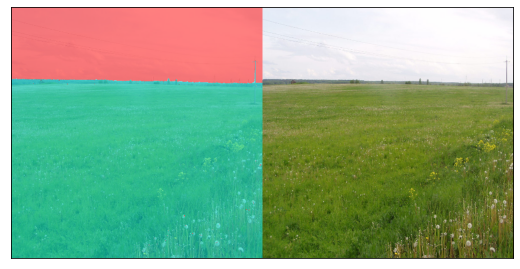

True

In [459]:
print(final_labels)

result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  2721.925517228511
For epsilon =  1360.9627586142556 : looking...
For epsilon =  680.4813793071278 : looking...
For epsilon =  340.2406896535639 : looking...
For epsilon =  170.12034482678195 : looking...
For epsilon =  85.06017241339097 : looking...
For epsilon =  42.530086206695486 : looking...
For epsilon =  21.265043103347743 : looking...
For epsilon =  10.632521551673872 : looking...
For epsilon =  5.316260775836936 : looking...
For epsilon =  2.658130387918468 : looking...
For epsilon =  1.329065193959234 : looking...
For epsilon =  0.664532596979617 : looking...
For epsilon =  0.3322662984898085 : looking...
For epsilon =  0.16613314924490424 : looking...
For epsilon =  0.08306657462245212 : looking...
For epsilon =  0.04153328731122606 : looking...
For epsilon =  0.02076664365561303 : looking...
For epsilon =  0.010383321827806515 : looking...
For epsilon =  0.005191660913903258 : looking...
For epsilon =  0.002595830456951629 : looking...
For epsilon

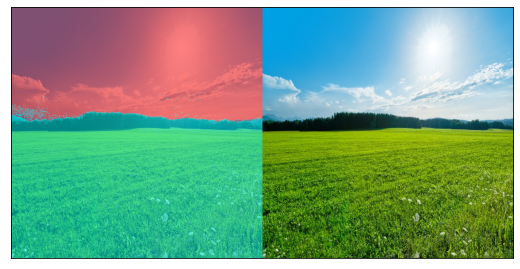

True

In [460]:
filename = "field2.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  1072.2114060674123
For epsilon =  536.1057030337062 : looking...
For epsilon =  268.0528515168531 : looking...
For epsilon =  134.02642575842654 : looking...
For epsilon =  67.01321287921327 : looking...
For epsilon =  33.506606439606635 : looking...
For epsilon =  16.753303219803318 : looking...
For epsilon =  8.376651609901659 : looking...
For epsilon =  4.188325804950829 : looking...
For epsilon =  2.0941629024754147 : looking...
For epsilon =  1.0470814512377074 : looking...
For epsilon =  0.5235407256188537 : looking...
For epsilon =  0.26177036280942684 : looking...
For epsilon =  0.13088518140471342 : looking...
For epsilon =  0.06544259070235671 : looking...
For epsilon =  0.032721295351178355 : looking...
For epsilon =  0.016360647675589177 : looking...
For epsilon =  0.008180323837794589 : looking...
For epsilon =  0.004090161918897294 : looking...
For epsilon =  0.002045080959448647 : looking...
For epsilon =  0.0010225404797243236 : looking...
Fo

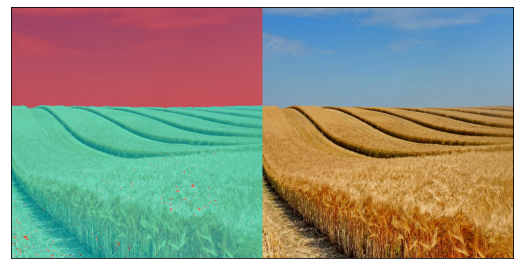

True

In [461]:
filename = "field3.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  457.8687618859448
For epsilon =  228.9343809429724 : looking...
For epsilon =  114.4671904714862 : looking...
For epsilon =  57.2335952357431 : looking...
For epsilon =  28.61679761787155 : looking...
For epsilon =  14.308398808935776 : looking...
For epsilon =  7.154199404467888 : looking...
For epsilon =  3.577099702233944 : looking...
For epsilon =  1.788549851116972 : looking...
For epsilon =  0.894274925558486 : looking...
For epsilon =  0.447137462779243 : looking...
For epsilon =  0.2235687313896215 : looking...
For epsilon =  0.11178436569481075 : looking...
For epsilon =  0.055892182847405374 : looking...
For epsilon =  0.027946091423702687 : looking...
For epsilon =  0.013973045711851343 : looking...
For epsilon =  0.006986522855925672 : looking...
For epsilon =  0.003493261427962836 : looking...
For epsilon =  0.001746630713981418 : looking...
For epsilon =  0.000873315356990709 : looking...
For epsilon =  0.0004366576784953545 : looking...
For ep

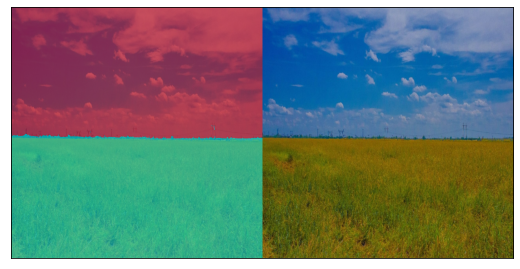

True

In [462]:
filename = "field4.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  67.33672988333406
For epsilon =  33.66836494166703 : looking...
For epsilon =  16.834182470833515 : looking...
For epsilon =  8.417091235416757 : looking...
For epsilon =  4.208545617708379 : looking...
For epsilon =  2.1042728088541893 : looking...
For epsilon =  1.0521364044270947 : looking...
For epsilon =  0.5260682022135473 : looking...
For epsilon =  0.26303410110677367 : looking...
For epsilon =  0.13151705055338683 : looking...
For epsilon =  0.06575852527669342 : looking...
For epsilon =  0.03287926263834671 : looking...
For epsilon =  0.016439631319173354 : looking...
For epsilon =  0.008219815659586677 : looking...
For epsilon =  0.0041099078297933385 : looking...
For epsilon =  0.0020549539148966693 : looking...
For epsilon =  0.0010274769574483346 : looking...
For epsilon =  0.0005137384787241673 : looking...
For epsilon =  0.00025686923936208366 : looking...
For epsilon =  0.00012843461968104183 : looking...
For epsilon =  6.421730984052091e-05

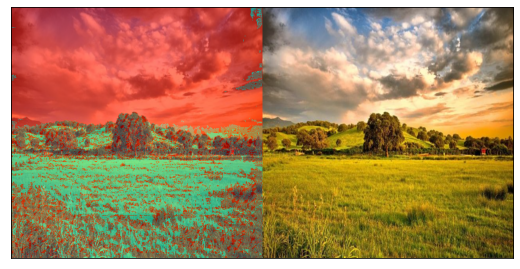

True

In [463]:
filename = "field5.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  118.71962719681456
For epsilon =  59.35981359840728 : looking...
For epsilon =  29.67990679920364 : looking...
For epsilon =  14.83995339960182 : looking...
For epsilon =  7.41997669980091 : looking...
For epsilon =  3.709988349900455 : looking...
For epsilon =  1.8549941749502274 : looking...
For epsilon =  0.9274970874751137 : looking...
For epsilon =  0.46374854373755686 : looking...
For epsilon =  0.23187427186877843 : looking...
For epsilon =  0.11593713593438922 : looking...
For epsilon =  0.05796856796719461 : looking...
For epsilon =  0.028984283983597304 : looking...
For epsilon =  0.014492141991798652 : looking...
For epsilon =  0.007246070995899326 : looking...
For epsilon =  0.003623035497949663 : looking...
For epsilon =  0.0018115177489748315 : looking...
For epsilon =  0.0009057588744874157 : looking...
For epsilon =  0.0004528794372437079 : looking...
For epsilon =  0.00022643971862185394 : looking...
For epsilon =  0.00011321985931092697 : l

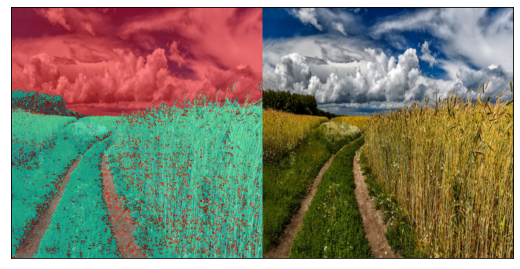

True

In [464]:
filename = "field6.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 20
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)